### Set up emulators to look at the effects of $\tau$ rescalings

Some basic syntax to set up some different emulators. A sensible place to start would be to compare the predictions of 3 emulators:

1. No $\tau$ rescalings
2. With $\tau$ rescalings, keeping the standard hyperparameters optimised without $\tau$ rescalings
3. With $\tau$ rescalings, re-optimising the hyperparams



In [1]:
import gp_emulator
import p1d_arxiv
import test_simulation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
font = {'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [3]:
## Common definitions
basedir="/p1d_emulator/sim_suites/Australia20/"
skewers_label='Ns500_wM0.05'
p1d_label=None
z_max=4

## Pick a test sim
test_sim_num=12

## z list
zs=np.linspace(4,2,9)

In [4]:
## Set up training sets with and without tau rescalings
archive_notau=p1d_arxiv.ArxivP1D(basedir=basedir,drop_sim_number=test_sim_num,
                            drop_tau_rescalings=True,z_max=z_max,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

archive_tau=p1d_arxiv.ArxivP1D(basedir=basedir,drop_sim_number=test_sim_num,
                            drop_tau_rescalings=False,z_max=z_max,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

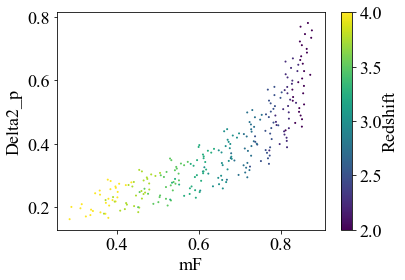

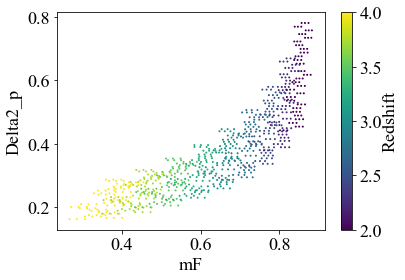

In [5]:
## Plot with and without tau scalings
archive_notau.plot_samples("mF","Delta2_p")
archive_tau.plot_samples("mF","Delta2_p")

In [6]:
## Build emulators
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']

## Set kmax
kmax_Mpc=8

## Set up default emulator - no tau rescalings, use saved hyperparams
## so we set train=False, and use load_default() method
emu_notau=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=z_max,
                                verbose=False,paramList=paramList,train=False,
                                emu_type="k_bin",passArxiv=archive_notau,
                                kmax_Mpc=kmax_Mpc)
emu_notau.load_default()

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


In [7]:
## Set up emulator with tau rescalings, default hyperparams
emu_tau_default=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=z_max,
                                verbose=False,paramList=paramList,train=False,
                                emu_type="k_bin",passArxiv=archive_tau,
                                kmax_Mpc=kmax_Mpc)
emu_tau_default.load_default()

In [8]:
## Tau rescalings, fresh hyperparams
emu_tau_fresh=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=z_max,
                                verbose=False,paramList=paramList,train=True,
                                emu_type="k_bin",passArxiv=archive_tau,
                                kmax_Mpc=kmax_Mpc)

Training GP on 783 points
Optimised


In [9]:
## Set up test simulation object
test_sim=test_simulation.TestSimulation(sim_label=test_sim_num,
            basedir=basedir,skewers_label=skewers_label,z_max=z_max,kmax_Mpc=kmax_Mpc,kp_Mpc=archive_notau.kp_Mpc)

In [10]:
## General plot params
y_min=0.95
y_max=1.05

Text(0.5, 0, 'k 1/Mpc')

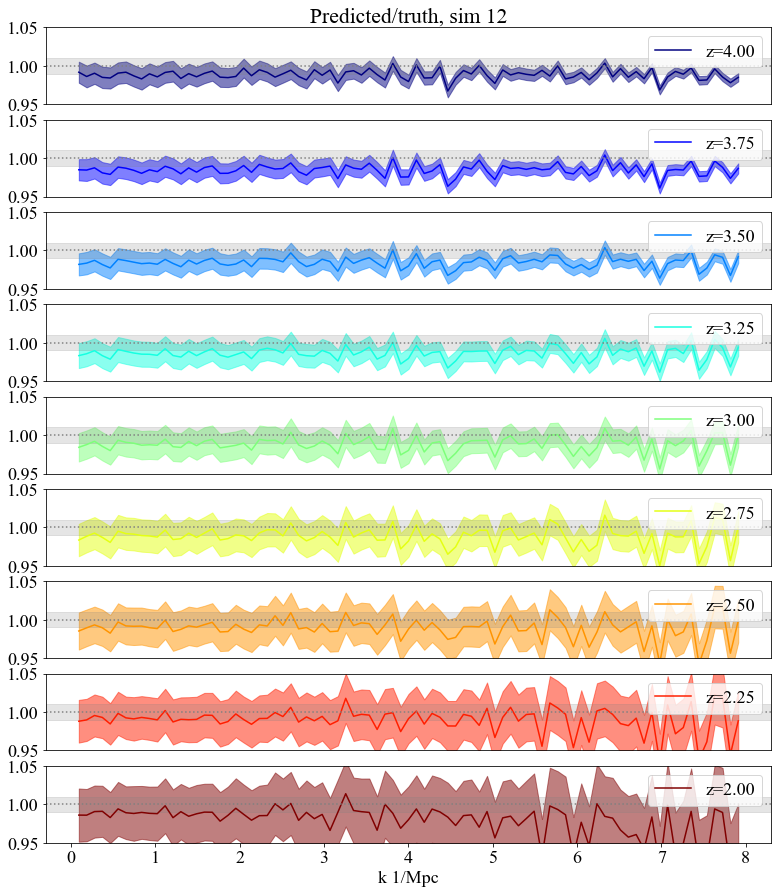

In [11]:
plt.figure(figsize=[13,15])
dex=0
for aa,z in enumerate(zs):
    ## Set up plot
    plt.subplot(len(zs),1,aa+1)
    if aa==0:
        plt.title("Predicted/truth, sim %s" % test_sim_num)
    col = plt.cm.jet(dex/(len(zs)-1))
    dex+=1
    
    ## Get truth from test_simulation object
    k_sim,pk_sim=test_sim.get_p1d_Mpc(z)
    k_true=k_sim[0][1:] ## Remove k=0 bin
    pk_true=pk_sim[1:]
    
    ## Get emulator prediction
    emu_call=test_sim.get_emulator_calls(z)
    pred,err=emu_notau.emulate_p1d_Mpc(emu_call,k_true,True,z)
    
    ## Plot ratio of prediction vs truth and uncertainty region
    plt.plot(k_true,pred/pk_true,color=col,linestyle="solid",label="z=%.2f" % z)
    plt.fill_between(k_true,(pred+np.sqrt(np.diag(err)))/pk_true,
            (pred-np.sqrt(np.diag(err)))/pk_true,alpha=0.5,color=col)
    
    ## 1% region and formatting things
    plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
    plt.axhline(1,linestyle=":",color="gray")
    plt.ylim(y_min,y_max)
    plt.legend(loc="upper right")
    if aa != 8:
        plt.xticks([])

plt.xlabel("k 1/Mpc")
#plt.savefig("notau_12.png")

Text(0.5, 0, 'k 1/Mpc')

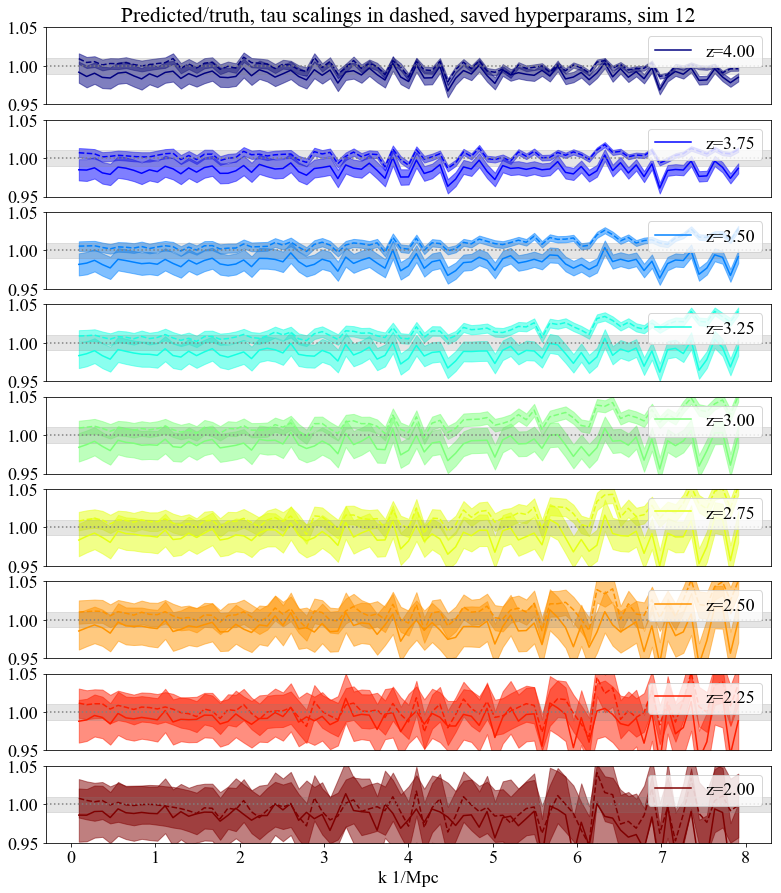

In [12]:
plt.figure(figsize=[13,15])
dex=0
for aa,z in enumerate(zs):
    ## Set up plot
    plt.subplot(len(zs),1,aa+1)
    if aa==0:
        plt.title("Predicted/truth, tau scalings in dashed, saved hyperparams, sim %s" % test_sim_num)
    col = plt.cm.jet(dex/(len(zs)-1))
    dex+=1
    
    ## Get truth from test_simulation object
    k_sim,pk_sim=test_sim.get_p1d_Mpc(z)
    k_true=k_sim[0][1:] ## Remove k=0 bin
    pk_true=pk_sim[1:]
    
    ## Get emulator prediction
    emu_call=test_sim.get_emulator_calls(z)
    pred,err=emu_notau.emulate_p1d_Mpc(emu_call,k_true,True,z)
    pred_tau,err_tau=emu_tau_default.emulate_p1d_Mpc(emu_call,k_true,True,z)
    
    ## Plot ratio of prediction vs truth and uncertainty region
    plt.plot(k_true,pred/pk_true,color=col,linestyle="solid",label="z=%.2f" % z)
    plt.fill_between(k_true,(pred+np.sqrt(np.diag(err)))/pk_true,
            (pred-np.sqrt(np.diag(err)))/pk_true,alpha=0.5,color=col)
    
    ## With tau rescalings
    plt.plot(k_true,pred_tau/pk_true,color=col,linestyle="dashed")
    plt.fill_between(k_true,(pred_tau+np.sqrt(np.diag(err_tau)))/pk_true,
            (pred_tau-np.sqrt(np.diag(err_tau)))/pk_true,alpha=0.5,color=col)
    
    ## 1% region and formatting things
    plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
    plt.axhline(1,linestyle=":",color="gray")
    plt.ylim(y_min,y_max)
    plt.legend(loc="upper right")
    if aa != 8:
        plt.xticks([])

plt.xlabel("k 1/Mpc")
#plt.savefig("tau_default12.png")

Text(0.5, 0, 'k 1/Mpc')

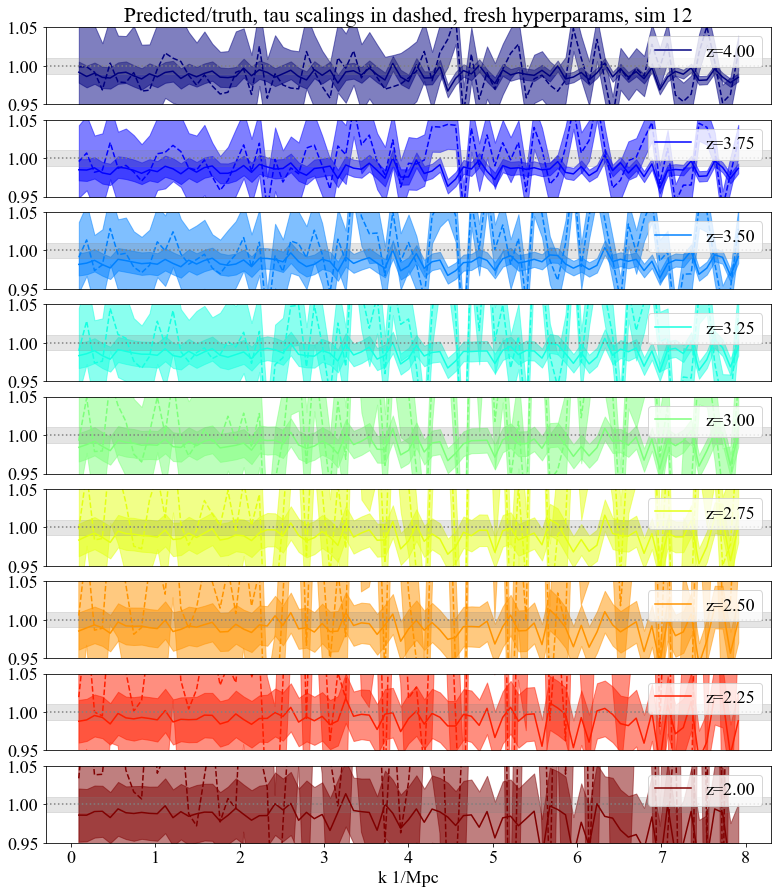

In [13]:
plt.figure(figsize=[13,15])
dex=0
for aa,z in enumerate(zs):
    ## Set up plot
    plt.subplot(len(zs),1,aa+1)
    if aa==0:
        plt.title("Predicted/truth, tau scalings in dashed, fresh hyperparams, sim %s" % test_sim_num)
    col = plt.cm.jet(dex/(len(zs)-1))
    dex+=1
    
    ## Get truth from test_simulation object
    k_sim,pk_sim=test_sim.get_p1d_Mpc(z)
    k_true=k_sim[0][1:] ## Remove k=0 bin
    pk_true=pk_sim[1:]
    
    ## Get emulator prediction
    emu_call=test_sim.get_emulator_calls(z)
    pred,err=emu_notau.emulate_p1d_Mpc(emu_call,k_true,True,z)
    pred_tau,err_tau=emu_tau_fresh.emulate_p1d_Mpc(emu_call,k_true,True,z)
    
    ## Plot ratio of prediction vs truth and uncertainty region
    plt.plot(k_true,pred/pk_true,color=col,linestyle="solid",label="z=%.2f" % z)
    plt.fill_between(k_true,(pred+np.sqrt(np.diag(err)))/pk_true,
            (pred-np.sqrt(np.diag(err)))/pk_true,alpha=0.5,color=col)
    
    ## With tau rescalings
    plt.plot(k_true,pred_tau/pk_true,color=col,linestyle="dashed")
    plt.fill_between(k_true,(pred_tau+np.sqrt(np.diag(err_tau)))/pk_true,
            (pred_tau-np.sqrt(np.diag(err_tau)))/pk_true,alpha=0.5,color=col)
    
    ## 1% region and formatting things
    plt.axhspan(0.99,1.01,color="gray",alpha=0.2)
    plt.axhline(1,linestyle=":",color="gray")
    plt.ylim(y_min,y_max)
    plt.legend(loc="upper right")
    if aa != 8:
        plt.xticks([])

plt.xlabel("k 1/Mpc")
#plt.savefig("tau_fresh12.png")